In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv("J:/projects/Sentiment Analysis/train.csv")
train_original = train.copy

In [3]:
test = pd.read_csv("J:/projects/Sentiment Analysis/test.csv")
test_original = test.copy

In [4]:
train.size

95886

In [5]:
test.size

34394

In [6]:
# Count the occurrences of each label
label_counts = train['label'].value_counts()

# Access the counts for labels 1 and 0
count_label_1 = label_counts[1.0]
count_label_0 = label_counts[0.0]

# Print the results
print("Number of labels with value 1:", count_label_1)
print("Number of labels with value 0:", count_label_0)

Number of labels with value 1: 2242
Number of labels with value 0: 29720


In [7]:
combine = pd.concat([train,test],ignore_index=True,sort=True)

In [8]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [9]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [10]:
def remove_pattern(text,pattern):
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i,'',text)
    return text

In [11]:
combine['tidy_tweets'] = np.vectorize(remove_pattern)(combine['tweet'],'@[\w]*')
combine.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
combine['tidy_tweets'] = combine['tidy_tweets'].str.replace('[^a-zA-Z#]', " ", regex=True)
combine.head(10)

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [13]:
combine['tidy_tweets'] = combine['tidy_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combine.head(10)

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [14]:
tokenized_tweet = combine['tidy_tweets'].apply(lambda x:x.split())
tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: tidy_tweets, dtype: object

In [15]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[ps.stem(i) for i in x])
tokenized_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: tidy_tweets, dtype: object

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [17]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [18]:
all_words_positive = " ".join(text for text in combine['tidy_tweets'][combine['label']==0])

In [19]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png',stream='true').raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(all_words_positive)

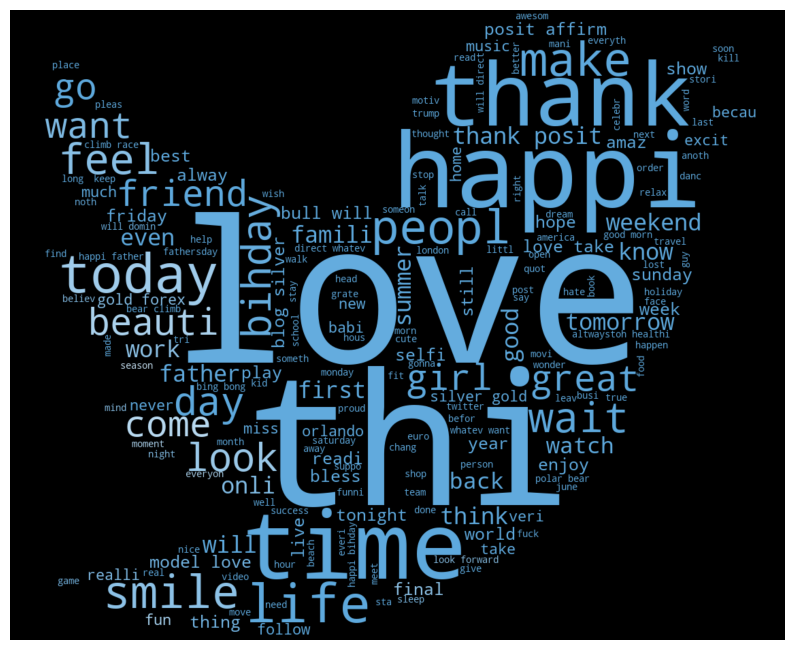

In [20]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='hamming')
plt.axis('off')
plt.show()

In [21]:
all_words_negatives = ' '.join(text for text in combine['tidy_tweets'][combine['label']==1])

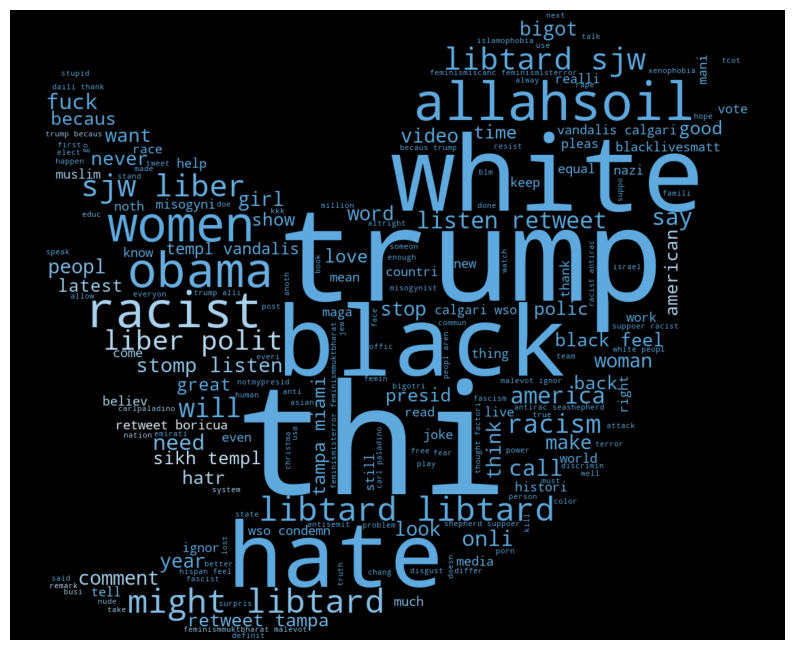

In [22]:
wc = WordCloud(background_color="black",height=1500,width=4000,mask=Mask).generate(all_words_negatives)
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='hamming')
plt.axis('off')
plt.show()

In [23]:
def hashtag_extract(x):
    hash = []
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hash.append(ht)
    return hash

In [24]:
ht_positive = hashtag_extract(combine['tidy_tweets'][combine['label']==0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [25]:
ht_positive_unnest = sum(ht_positive,[])
ht_positive_unnest

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [26]:
ht_negative = hashtag_extract(combine['tidy_tweets'][combine['label']==1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [27]:
ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [28]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [29]:
df_positive = pd.DataFrame({'hashtags':list(word_freq_positive.keys()) ,'count':list(word_freq_positive.values())})
df_positive.head()

,hashtags,count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


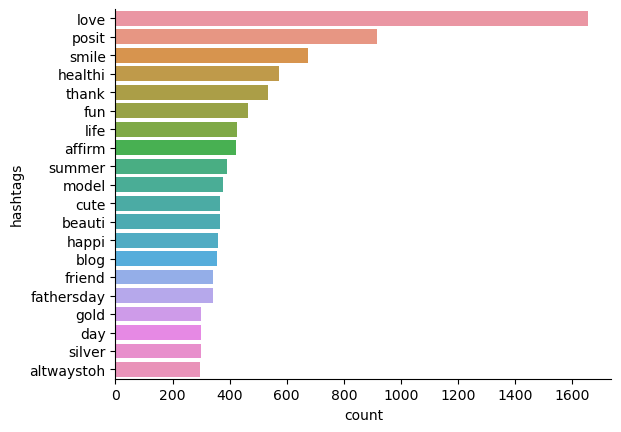

In [30]:
df_positive_plot = df_positive.nlargest(20,columns='count')
sns.barplot(data=df_positive_plot,y='hashtags',x='count')
sns.despine()

In [31]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [32]:
df_negative = pd.DataFrame({'hashtags':list(word_freq_negative.keys()) ,'count':list(word_freq_negative.values())})
df_negative.head()

,hashtags,count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


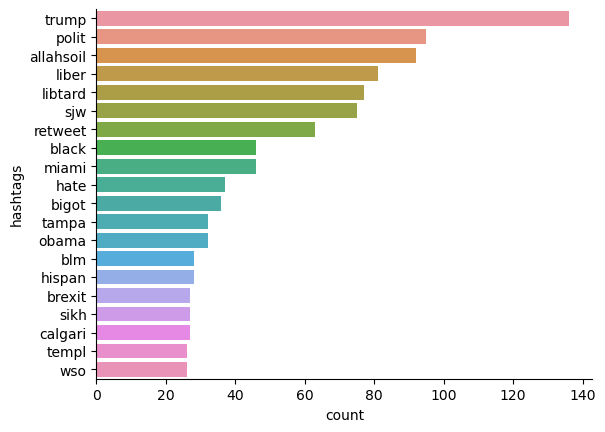

In [33]:
df_negative_plot = df_negative.nlargest(20,columns='count')
sns.barplot(data=df_negative_plot,y='hashtags',x='count')
sns.despine()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweets'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf_matrix = tfidf.fit_transform(combine['tidy_tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
train_tfidf = tfidf_matrix[:31962]
train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

def create_balanced_sets(X_bow, X_tfidf, y):
    """
    Creates balanced training sets using SMOTE
    """
    # Convert sparse matrices to dense for SMOTE
    if sparse.issparse(X_bow):
        X_bow = X_bow.toarray()
    if sparse.issparse(X_tfidf):
        X_tfidf = X_tfidf.toarray()
        
    smote = SMOTE(random_state=42)
    X_bow_resampled, y_bow_resampled = smote.fit_resample(X_bow, y)
    X_tfidf_resampled, y_tfidf_resampled = smote.fit_resample(X_tfidf, y)
    
    return X_bow_resampled, X_tfidf_resampled, y_bow_resampled

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluates a model and returns metrics
    """
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    
    # Cross validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision,
        'cv_scores_mean': cv_scores.mean(),
        'cv_scores_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'model' : model
    }

def plot_learning_curves(model_results, title):
    """
    Plots ROC and Precision-Recall curves
    """
    plt.figure(figsize=(15, 5))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    for result in model_results:
        plt.plot(result['fpr'], result['tpr'], 
                label=f"{result['model_name']} (AUC = {result['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    
    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for result in model_results:
        plt.plot(result['recall'], result['precision'],
                label=f"{result['model_name']} (AP = {result['avg_precision']:.2f})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc="lower left")
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def print_model_metrics(results):
    """
    Prints detailed metrics for each model
    """
    metrics_df = pd.DataFrame([
        {
            'Model': r['model_name'],
            'Accuracy': r['accuracy'],
            'ROC AUC': r['roc_auc'],
            'Avg Precision': r['avg_precision'],
            'CV Score': f"{r['cv_scores_mean']:.3f} (±{r['cv_scores_std']:.3f})"
        }
        for r in results
    ])
    
    print("\nModel Performance Metrics:")
    print(metrics_df.to_string(index=False))

def plot_confusion_matrices(results, y_test):
    """
    Plots confusion matrices for all models
    """
    n_models = len(results)
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
    
    for idx, (result, ax) in enumerate(zip(results, axes.flatten() if n_models > 1 else [axes])):
        cm = confusion_matrix(y_test, result['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
        ax.set_title(f"Confusion Matrix\n{result['model_name']}")
        ax.set_ylabel('True Label')
        ax.set_xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()

# Main execution pipeline
def run_sentiment_analysis():
    """
    Runs the complete sentiment analysis pipeline
    """
    print("Starting sentiment analysis pipeline...")
    
    # Split data into train and test sets
    X_train_bow, X_test_bow = train_test_split(train_bow, test_size=0.2, random_state=42)
    X_train_tfidf, X_test_tfidf = train_test_split(train_tfidf, test_size=0.2, random_state=42)
    y_train, y_test = train_test_split(train['label'], test_size=0.2, random_state=42)
    
    # Create balanced training sets
    print("Balancing training data with SMOTE...")
    X_train_bow_balanced, X_train_tfidf_balanced, y_train_balanced = create_balanced_sets(
        X_train_bow.toarray(), X_train_tfidf.toarray(), y_train
    )
    
    # Initialize models
    models = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }
    
    # Evaluate models with both BOW and TF-IDF
    bow_results = []
    tfidf_results = []
    
    print("\nEvaluating models...")
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Evaluate with BOW
        bow_result = evaluate_model(
            model, X_train_bow_balanced, X_test_bow, 
            y_train_balanced, y_test, f"{name} (BOW)"
        )
        bow_results.append(bow_result)
        
        # Evaluate with TF-IDF
        tfidf_result = evaluate_model(
            model, X_train_tfidf_balanced, X_test_tfidf, 
            y_train_balanced, y_test, f"{name} (TF-IDF)"
        )
        tfidf_results.append(tfidf_result)
    
    # Plot results
    print("\nPlotting results...")
    plot_learning_curves(bow_results, "BOW Features - Model Comparison")
    plot_learning_curves(tfidf_results, "TF-IDF Features - Model Comparison")
    
    # Print metrics
    print_model_metrics(bow_results + tfidf_results)
    
    # Plot confusion matrices
    plot_confusion_matrices(bow_results, y_test)
    plot_confusion_matrices(tfidf_results, y_test)
    
    # Find best model
    all_results = bow_results + tfidf_results
    best_model_result = max(all_results, key=lambda x: x['roc_auc'])
    
    print(f"\nBest Model: {best_model_result['model_name']}")
    print(f"ROC AUC: {best_model_result['roc_auc']:.3f}")
    print(f"Average Precision: {best_model_result['avg_precision']:.3f}")
    
    return best_model_result



Starting sentiment analysis pipeline...
Balancing training data with SMOTE...

Evaluating models...

Evaluating Naive Bayes...

Evaluating Logistic Regression...

Evaluating XGBoost...

Plotting results...


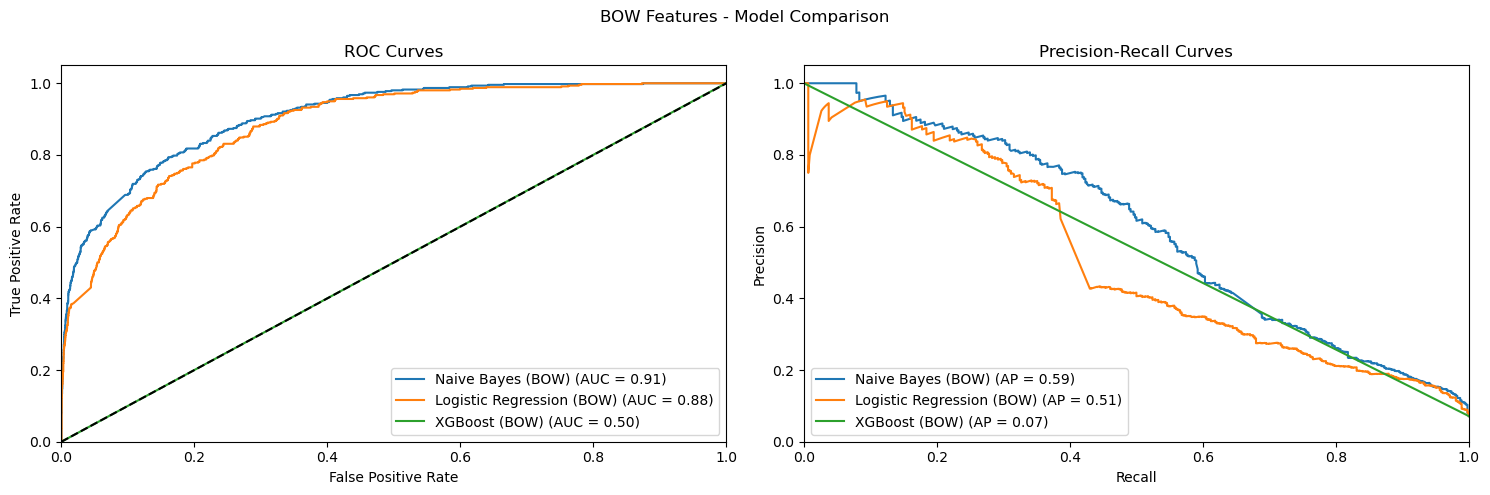

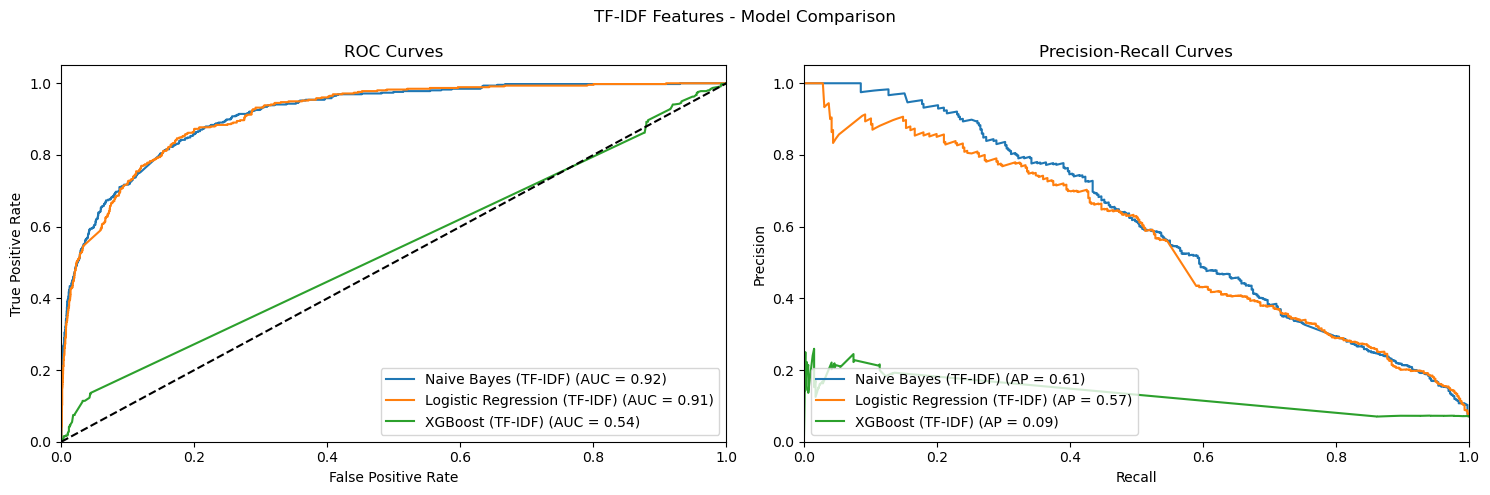


Model Performance Metrics:
                       Model  Accuracy  ROC AUC  Avg Precision       CV Score
           Naive Bayes (BOW)  0.909901 0.907224       0.588786 0.830 (±0.071)
   Logistic Regression (BOW)  0.874863 0.884250       0.506012 0.918 (±0.020)
               XGBoost (BOW)  0.928672 0.500337       0.071373 0.882 (±0.013)
        Naive Bayes (TF-IDF)  0.871735 0.915541       0.606107 0.855 (±0.004)
Logistic Regression (TF-IDF)  0.865321 0.914211       0.569843 0.899 (±0.006)
            XGBoost (TF-IDF)  0.928516 0.536185       0.089658 0.881 (±0.007)


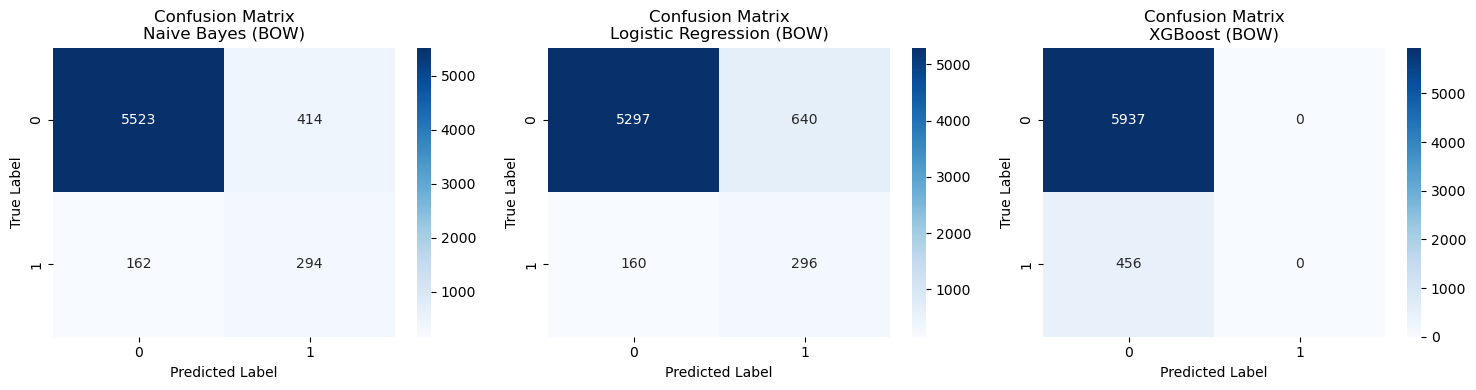

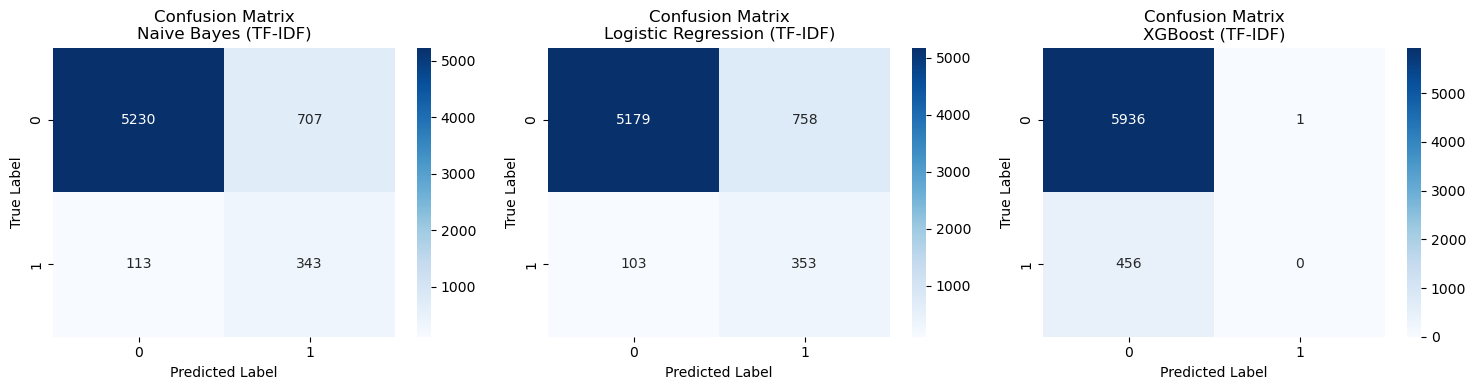


Best Model: Naive Bayes (TF-IDF)
ROC AUC: 0.916
Average Precision: 0.606


In [39]:
# Run the analysis
from scipy import sparse
best_model_result = run_sentiment_analysis()

In [40]:
# Make predictions on test data
def predict_test_data(best_model_result):
    """
    Makes predictions on test data using the best model
    """
    print("\nMaking predictions on test data...")
    
    # Get test features based on best model type
    if "BOW" in best_model_result['model_name']:
        test_features = bow_vectorizer.transform(combine['tidy_tweets'][31962:])
    else:
        test_features = tfidf.transform(combine['tidy_tweets'][31962:])
    
    # Make predictions
    test_predictions = best_model_result['model'].predict(test_features)
    test_probabilities = best_model_result['model'].predict_proba(test_features)[:, 1]
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'text': combine['tidy_tweets'][31962:],
        'predicted_sentiment': test_predictions,
        'probability': test_probabilities
    })
    
    # Save results
    results_df.to_csv('sentiment_predictions.csv', index=False)
    print("Predictions saved to 'sentiment_predictions.csv'")
    
    # Print summary
    print("\nTest Data Prediction Summary:")
    print(f"Total samples: {len(test_predictions)}")
    print(f"Positive predictions: {sum(test_predictions == 1)}")
    print(f"Negative predictions: {sum(test_predictions == 0)}")
    print(f"Positive ratio: {sum(test_predictions == 1) / len(test_predictions):.2%}")
    
    return results_df

# Make predictions on test data
test_predictions_df = predict_test_data(best_model_result)


Making predictions on test data...
Predictions saved to 'sentiment_predictions.csv'

Test Data Prediction Summary:
Total samples: 17197
Positive predictions: 2871
Negative predictions: 14326
Positive ratio: 16.69%


In [42]:
test_predictions_df

,text,predicted_sentiment,probability
31962,#studiolif #aislif #requir #passion #dedic #wi...,0,0.308144
31963,#white #supremacist want everyon #bird #movi here,0,0.251061
31964,safe way heal your #acn #altwaystoh #healthi #...,0,0.009901
31965,curs child book reserv alreadi where when #har...,0,0.073033
31966,#bihday amaz hilari #nephew ahmir uncl dave lo...,0,0.001908
...,...,...,...
49154,thought factori left right polaris #trump #use...,1,0.997476
49155,feel like mermaid #hairflip #neverreadi #forma...,0,0.023098
49156,#hillari #campaign today #ohio use word like a...,1,0.822108
49157,happi work confer right mindset lead cultur de...,0,0.013825
